#### ANOTHER EDA ANALYSIS TO BOOTRESS KNOWLEDGE

In [49]:
#Lets import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model 

In [50]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') 

In [51]:
# let check the shape
train.shape , test.shape  

((1460, 81), (1459, 80))

#### the same shows that the due is not equal, so we cannot merge them

In [52]:
train.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
test.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### LETS EXAMINE univariate variable ie target variable

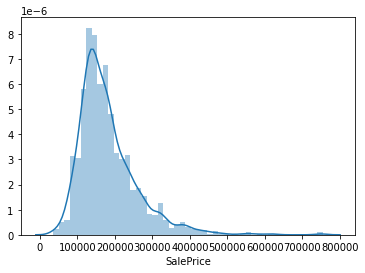

In [54]:
# lets view the distribution 
sns.distplot(train['SalePrice']) 

## The above plot shows that there are postive skewness in the target variable.
### we can also confirm it by deducing the magnitude as shown below

In [55]:
sk = train['SalePrice'].skew() 
print(f'The skew value is : {sk}') 

The skew value is : 1.8828757597682129


#### Take note that if skew is:
#### 1. between -0.5 > & 0.5, it is fairly symmetrical.
#### 2. -1 & -0.5 or between 0.5 & 1: it is moderate.
#### 3. less than -1 or greater that 1, it is highly skewed.
#### So based on our case, it is highly skewed and need to be taken care of.

In [56]:
# let the log
salelog = np.log(train['SalePrice'])
print(f'The skew value is:{salelog.skew()}') 

The skew value is:0.12133506220520406


#### Based on the value above, the skew is moderate. Let also see the distribution.

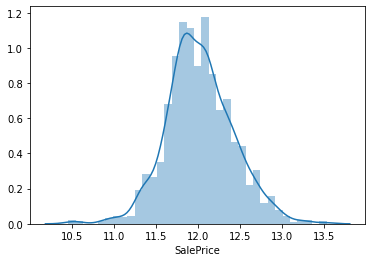

In [57]:
sns.distplot(salelog) 

#### We will take this new value as our current SalePrice value

In [58]:
SalePrice = salelog 
SalePrice.shape 

(1460,)

#### Lets see how other variables related,associate or correlate with the target variable.
## Bivariate Analysis

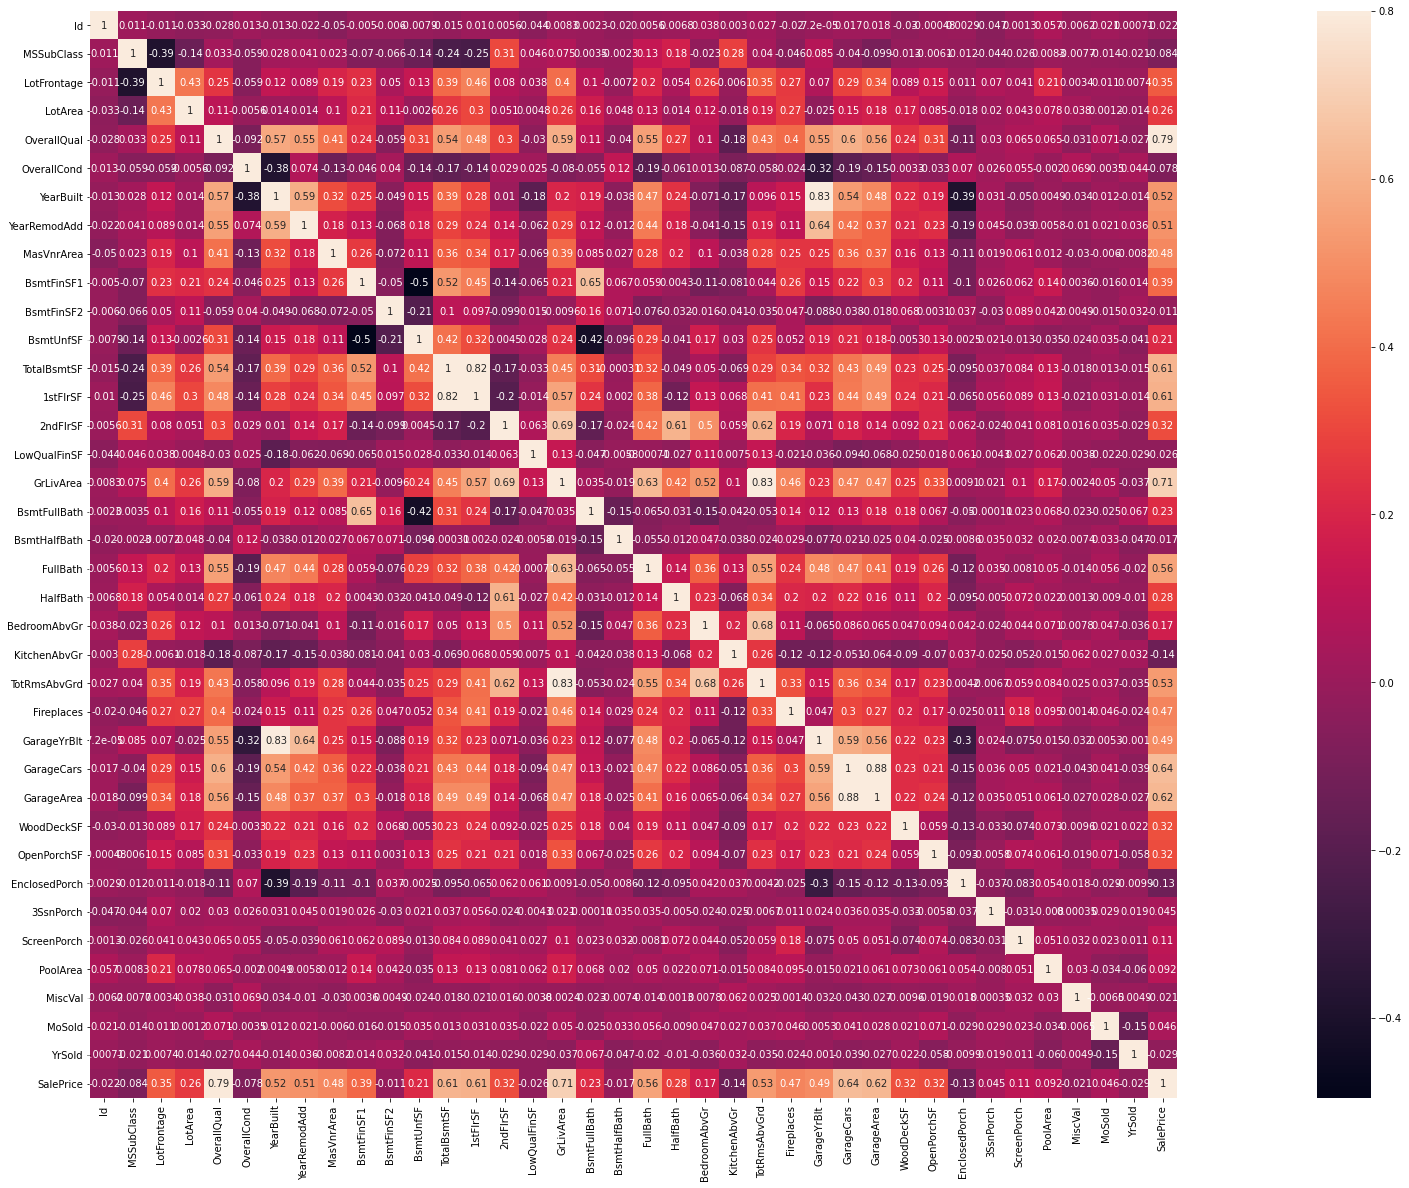

In [59]:
# lets use the heatmap to do this
cor = train.corr()
plt.subplots(figsize=(50,20))  
sns.heatmap(cor,vmax=0.8,square=True,annot=True) 

In [60]:
# let sort the variable that have moderate correlation with
#the target variable
heatcor =cor['SalePrice'].sort_values(ascending=False).head(15).to_frame()
heatcor

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


## Lets take care of the missing variables

In [61]:
# Due to the large number of the data, lets sort it with increase other
tot = train.isnull().sum().sort_values(ascending=False)
train_missn = pd.concat([tot], axis=1,keys=['tot','Percent'])
train_missn.head(10) 

,tot
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [62]:
# Due to the large number of the data, lets sort it with increase other
tot1 = test.isnull().sum().sort_values(ascending=False)
test_missn = pd.concat([tot1], axis=1,keys=['tot1','Percent'])
test_missn.head(10) 

,tot1
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
LotFrontage,227
GarageCond,78
GarageQual,78
GarageYrBlt,78
GarageFinish,78


In [63]:
# Look at the variables, we know that that the total index is 1460 
# we can assume that variables with missing value 2/3 of total index 
# need to be drop. so let drop them
train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'],axis=1,
                   inplace=True) 
train1 = train

In [64]:
# let do same to test data
test.drop(['PoolQC', 'MiscFeature','Alley','Fence'], axis=1, 
                 inplace=True) 
test1=test

In [65]:
# Lets check for the presence of any of the above variable
#x=train1['PoolQC']
#x

In [66]:
# LET FILTER AND EXAMINE THE NUMERIC VARIABLE
num = train1.select_dtypes(include=[np.number]) 
num.columns  

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [67]:
num1 = test.select_dtypes(include=[np.number]) 
num1.columns 

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

### Let fill the missing value 

In [68]:
num.isnull().sum() 
# result show that we have only two missing value

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [69]:
num1.isnull().sum() 

Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [70]:
# Let fill the continous data with mean
num['LotFrontage'].fillna(num['LotFrontage'].mean(), inplace=True) 
num['GarageYrBlt'].fillna(num['GarageYrBlt'].mean(), inplace=True) 
num['MasVnrArea'].fillna(num['MasVnrArea'].mean(), inplace=True)  

/root/.virtualenvs/deep/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [71]:
num.isnull().sum().max() 

0

In [72]:
num1['LotFrontage'].fillna(num1['LotFrontage'].mean(), inplace=True)
num1['GarageArea'].fillna(num1['GarageArea'].mean(),inplace=True)
num1['GarageCars'].fillna(num1['GarageCars'].mean(),inplace=True)
num1['GarageYrBlt'].fillna(num1['GarageYrBlt'].mean(),inplace=True)
num1['BsmtHalfBath'].fillna(num1['BsmtHalfBath'].mean(),inplace=True)
num1['BsmtFullBath'].fillna(num1['BsmtFullBath'].mean(),inplace=True)
num1['TotalBsmtSF'].fillna(num1['TotalBsmtSF'].mean(),inplace=True)
num1['BsmtUnfSF'].fillna(num1['BsmtUnfSF'].mean(),inplace=True)
num1['BsmtFinSF2'].fillna(num1['BsmtFinSF2'].mean(),inplace=True)
num1['BsmtFinSF1'].fillna(num1['BsmtFinSF1'].mean(),inplace=True)
num1['MasVnrArea'].fillna(num1['MasVnrArea'].mean(),inplace=True)               

In [73]:
    num1.isnull().sum().max() 

0

## Let also examine the categorical featuress

In [74]:
cat = train1.select_dtypes(include=[np.object])
cat.isnull().sum() 

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

In [75]:
cat1 = test1.select_dtypes(include=[np.object])
cat1.isnull().sum()  

MSZoning           4
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        16
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
PavedDrive         0
SaleType           1
SaleCondition      0
dtype: int64

### Let replace the missing categorical value with mode

In [76]:
# code for training categorical variable
for col in cat:
    if cat[col].isnull().sum() > 0:
        cat[col] = cat[col].fillna(cat[col].mode()[0])
    else:
        None
cat.isnull().sum().max() 

/root/.virtualenvs/deep/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0

In [77]:
# code for test categorical varibles
for col in cat1:
    if cat1[col].isnull().sum() > 0:
        cat1[col] = cat1[col].fillna(cat1[col].mode()[0])
    else:
        None
cat1.isnull().sum().max() 

/root/.virtualenvs/deep/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0

#### Lets return our numeric and categorical variable back to train1 and test1

In [78]:
# code for training data
train2 = pd.concat([num,cat],axis=1)
train2.isnull().sum().max() 

0

In [79]:
# code for test data
test2 = pd.concat([num1,cat1],axis=1)
test2.isnull().sum().max() 

0

### Lets treat outlier. for outliers we will use only numeric variables

In [80]:
# Let use quartile method to compute our outlier. there are other method
# let keep the types for record purpose
types = train2.dtypes
outliers = train2.apply(lambda x: sum((x < (x.quantile(.25) - 1.5 * (x.quantile(.75) - x.quantile(.25)))) | 
                                   (x > (x.quantile(.75) + 1.5 * (x.quantile(.75) - x.quantile(.25)))) 
                                      if x.name in num else '' ))
out = pd.DataFrame({'Types':types, 'Outliers':outliers}).sort_values(by=['Types'],ascending=True)
out.T 

,Id,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,...,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterCond,SaleCondition
Types,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,...,object,object,object,object,object,object,object,object,object,object
Outliers,0,35,68,30,5,5,32,77,208,24,...,0,0,0,0,0,0,0,0,0,0


#### Let review the outliers and see the ones that has correlation with SalePrice.
#### so that se can treat  them.
#### if we see look at our heatmap above, we will see that GrLivArea has the high correlation of 0.79, let train it.

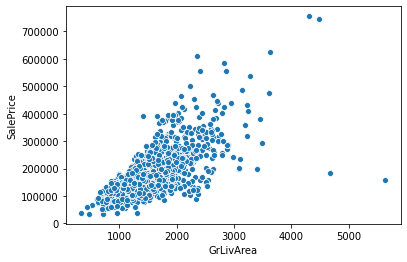

In [81]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train2) 

In [82]:
# look at image above, we observe two extreme point. let trim them off
train2 = train2[train2['GrLivArea'] < 4000]

## let handle the label encoder for cat and cat1 above

In [83]:
# encoder for training categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
l_encoders = {}
for col in cat:
    l_encoders[col] = LabelEncoder()
    train2[col] = l_encoders[col].fit_transform(train2[col]) 

In [84]:
# encoder for test categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
l_encoders = {}
for col in cat1:
    l_encoders[col] = LabelEncoder()
    test2[col] = l_encoders[col].fit_transform(test2[col]) 

In [85]:
# extract the independent variable
xtrain = train2.drop('SalePrice',axis = 1) 
ytrain = train2['SalePrice']
xtrain.shape , ytrain.shape

((1456, 76), (1456,))

## Let Build the Model

In [86]:
# import the neccessary variables
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
# import xgboost as xgb

### Linear Regression

In [87]:
model1 = LinearRegression()
model1.fit(xtrain, ytrain)

LinearRegression()

In [88]:
model1.score(xtrain, ytrain)  

0.9036462624698226

 ## Let Try Gradient Boost
 

In [89]:
# we will try to use hyper tunning
model2 = GradientBoostingRegressor(n_estimators=3000,learning_rate=.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, 
                                    min_samples_split=10, loss='huber',random_state=5) 

In [90]:
model2.fit(xtrain, ytrain) 

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=5)

In [91]:
model2.score(xtrain, ytrain) 

0.9902937813175512

### Let apply our prediction on test dataset---test2

In [92]:
# lets make our predict
pred1 = model1.predict(test2)
pred2 = model2.predict(test2)

In [93]:
final = (pred1+pred2)/2
final

array([121999.0380492 , 162450.93550578, 185049.59724452, ...,
       164728.45219638, 120578.80480017, 222487.35514988])

## My submission

In [96]:
sample_sub = pd.read_csv('sample_submission1.csv') 
sample_sub.head()
#submit['SalePrice'] = final
#submit.to_csv('final_submission.csv',index=False) 

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [97]:
sample_sub['SalePrice'] = final
sample_sub.to_csv('myFinal_submission.csv') 

# THIS IS MY MODEL. I WILL KEEP ON TRYING